In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_breast_cancer

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.head())
print("Target values:", y.unique())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (455, 30)
Testing size: (114, 30)


In [4]:
# Create models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

In [5]:
comparison_df = pd.DataFrame(results,
                             columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.956140,0.945946,0.985915,0.965517
1,Decision Tree,0.929825,0.943662,0.943662,0.943662
2,Random Forest,0.964912,0.958904,0.985915,0.972222
3,SVM,0.947368,0.922078,1.000000,0.959459


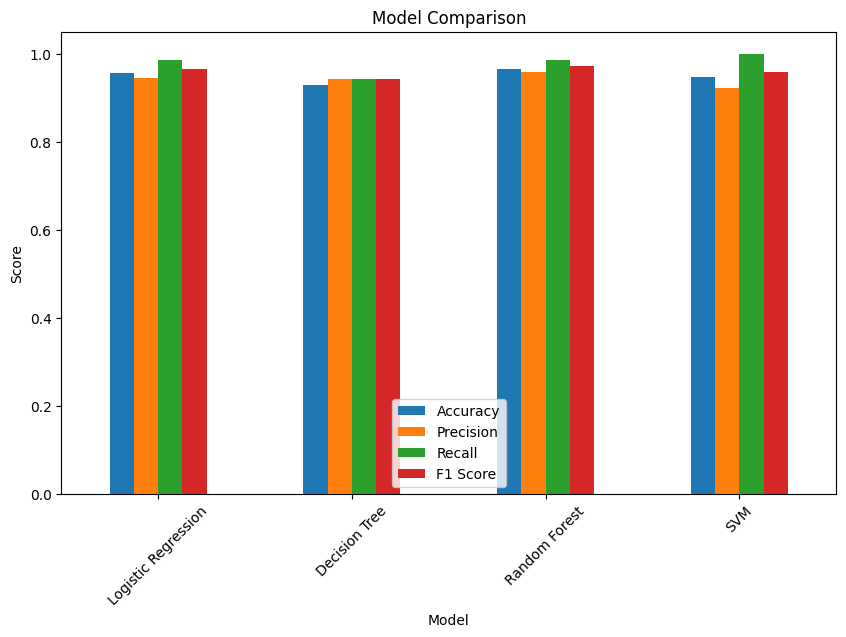

In [6]:
comparison_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [7]:
best_model_name = comparison_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print("Best Model is:", best_model_name)

Best Model is: Random Forest


In [8]:
import joblib

best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']